In [4]:
!pip install xgboost

In [5]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
data_fighters = pd.read_csv('/Users/alexandergeiger/fighters.csv', delimiter = ',')
data_matches = pd.read_csv('/Users/alexandergeiger/popular_matches.csv', delimiter = ',')

In [7]:
data_fighters.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


In [8]:
data_matches.head(10)

,date,place,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict
0,31 August 2019,Unknown,Vasyl Lomachenko,Luke Campbell,72,72,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko won via UD in round 12
1,19 September 2019,Unknown,Orlando Fiordigiglio,Sam Eggington,59,59,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,3.03,6.25,152.50,148.93,Eggington won via KO in round 2
2,5 October 2019,Unknown,Gennady Golovkin,Sergiy Derevyanchenko,82,82,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin won via UD in round 12
3,12 October 2019,Unknown,Chazz Witherspoon,Oleksandr Usyk,69,69,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,4.76,NaN,292.71,200.10,Usyk won via RTD in round 7
4,27 September 2019,Unknown,Ebenezer Tetteh,Daniel Dubois,46,46,NaN,44.4,50.0,69.0,38,39.0,23.68,30.77,0.00,0.00,178.67,230.38,Dubois won via TKO in round 1
5,28 September 2019,Unknown,Shawn Porter,Errol Spence Jr,66,66,63.8,62.3,80.0,77.0,219,108.0,7.76,19.44,0.00,0.00,152.53,148.47,Spence Jr won via SD in round 12
6,13 September 2019,Unknown,Zaur Abdullaev,Devin Haney,64,64,58.4,47.0,72.0,73.0,60,110.0,8.33,12.73,0.00,0.00,0.00,0.00,Haney won via RTD in round 4
7,14 September 2019,Unknown,Tyson Fury,Otto Wallin,72,72,66.5,57.4,86.0,77.0,174,90.0,11.49,14.44,0.00,0.00,247.50,240.54,Fury won via UD in round 12
8,31 August 2019,Unknown,Alexander Povetkin,Hughie Fury,74,74,72.6,60.0,81.0,77.0,231,130.0,10.39,10.00,2.78,NaN,235.57,235.40,Povetkin won via UD in round 12
9,18 October 2019,Unknown,Artur Beterbiev,Oleksandr Gvozdyk,88,88,68.4,67.5,81.0,78.0,52,88.0,26.92,15.91,0.00,0.00,178.65,174.95,Beterbiev won via TKO in round 10


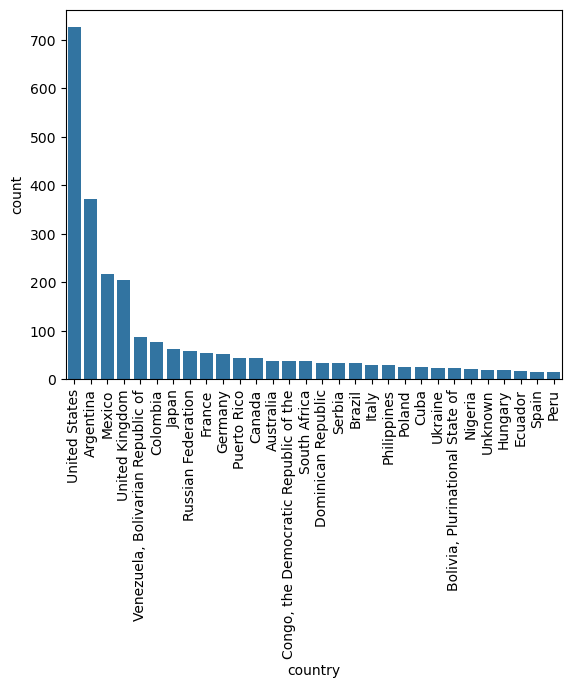

In [9]:
sns.countplot(x = data_fighters['country'], order = data_fighters['country'].value_counts().head(30).index)
plt.xticks(rotation = 90)
plt.show()

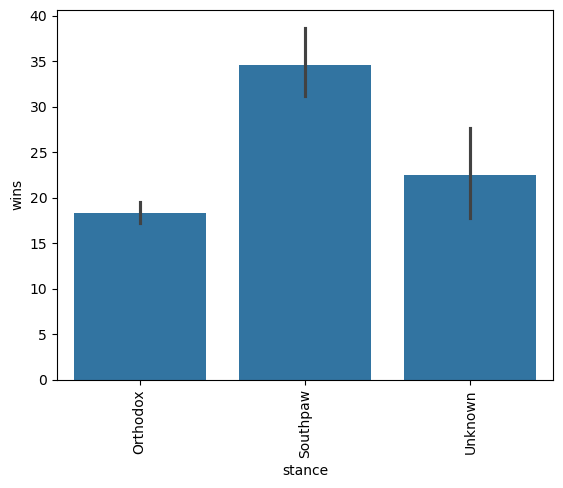

In [10]:
# the mean of list_ per prefer stance
sns.barplot(x = data_fighters['stance'], y = data_fighters['wins'])
plt.xticks(rotation = 90)
plt.show()

In [11]:
data_fighters["height_cm"] = data_fighters["height"].str.extract(r"\(([\d.]+)\s*[mM]\)").astype(float) * 100
print(data_fighters["height_cm"].head())
print(data_fighters["height_cm"].dtype)

0      NaN
1      NaN
2      NaN
3    175.0
4      NaN
Name: height_cm, dtype: float64
float64


In [12]:
data_fighters["reach_cm"] = data_fighters["reach"].str.extract(r"\((\d+)\s*cm\)").astype(float)
print(data_fighters["reach_cm"].head(10))
print(data_fighters["reach_cm"].dtype)

0      NaN
1      NaN
2      NaN
3    179.0
4      NaN
5      NaN
6    183.0
7      NaN
8      NaN
9      NaN
Name: reach_cm, dtype: float64
float64


/var/folders/9q/mnx2nsl14_70dg4b4pylr88r0000gn/T/ipykernel_1317/1350962501.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_fighters.groupby("height_bin")["wins"].mean().reset_index()


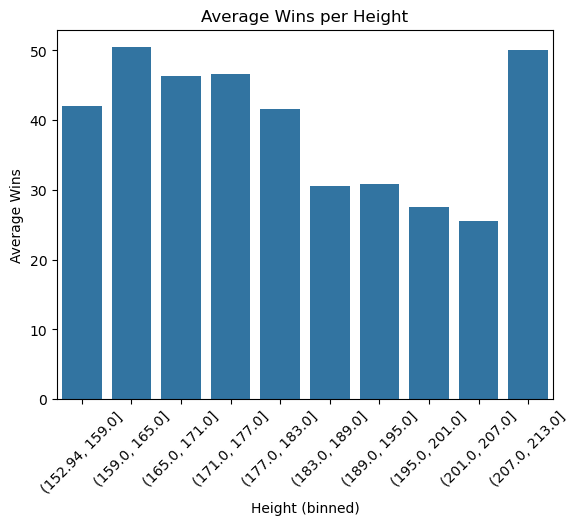

/var/folders/9q/mnx2nsl14_70dg4b4pylr88r0000gn/T/ipykernel_1317/1350962501.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_fighters.groupby("height_bin")["wins"].mean().reset_index()


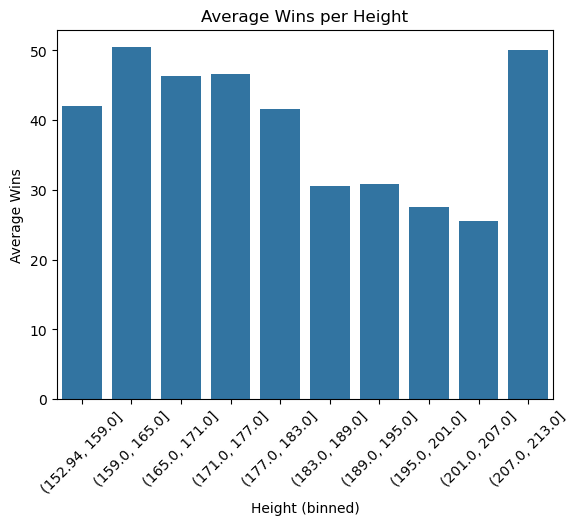

In [13]:
data_fighters["height_bin"] = pd.cut(data_fighters["height_cm"], bins=10)

grouped = data_fighters.groupby("height_bin")["wins"].mean().reset_index()

sns.barplot(x=grouped["height_bin"].astype(str), y=grouped["wins"])
plt.xticks(rotation=45)
plt.xlabel("Height (binned)")
plt.ylabel("Average Wins")
plt.title("Average Wins per Height")
plt.show()
grouped = data_fighters.groupby("height_bin")["wins"].mean().reset_index()

sns.barplot(x=grouped["height_bin"].astype(str), y=grouped["wins"])
plt.xticks(rotation=45)
plt.xlabel("Height (binned)")
plt.ylabel("Average Wins")
plt.title("Average Wins per Height")
plt.show()

/var/folders/9q/mnx2nsl14_70dg4b4pylr88r0000gn/T/ipykernel_1317/2535399239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_fighters.groupby("reach_bin")["wins"].mean().reset_index()


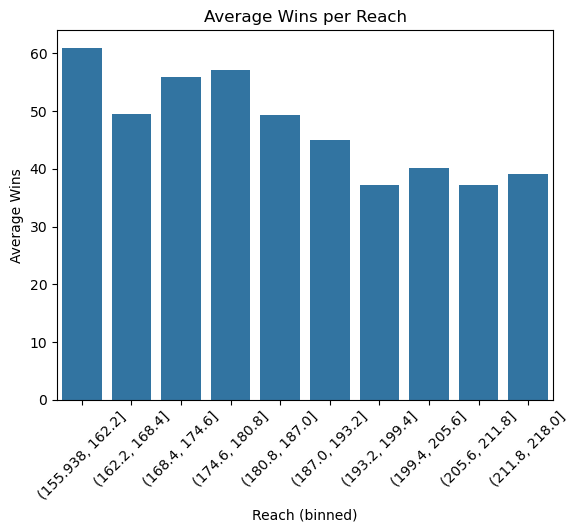

/var/folders/9q/mnx2nsl14_70dg4b4pylr88r0000gn/T/ipykernel_1317/2535399239.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_fighters.groupby("reach_bin")["wins"].mean().reset_index()


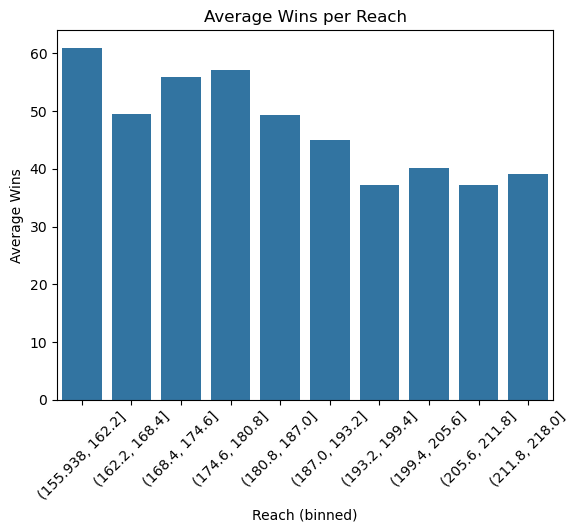

In [14]:
data_fighters["reach_bin"] = pd.cut(data_fighters["reach_cm"], bins=10)
grouped = data_fighters.groupby("reach_bin")["wins"].mean().reset_index()

sns.barplot(x=grouped["reach_bin"].astype(str), y=grouped["wins"])
plt.xticks(rotation=45)
plt.xlabel("Reach (binned)")
plt.ylabel("Average Wins")
plt.title("Average Wins per Reach")
plt.show()
grouped = data_fighters.groupby("reach_bin")["wins"].mean().reset_index()

sns.barplot(x=grouped["reach_bin"].astype(str), y=grouped["wins"])
plt.xticks(rotation=45)
plt.xlabel("Reach (binned)")
plt.ylabel("Average Wins")
plt.title("Average Wins per Reach")
plt.show()


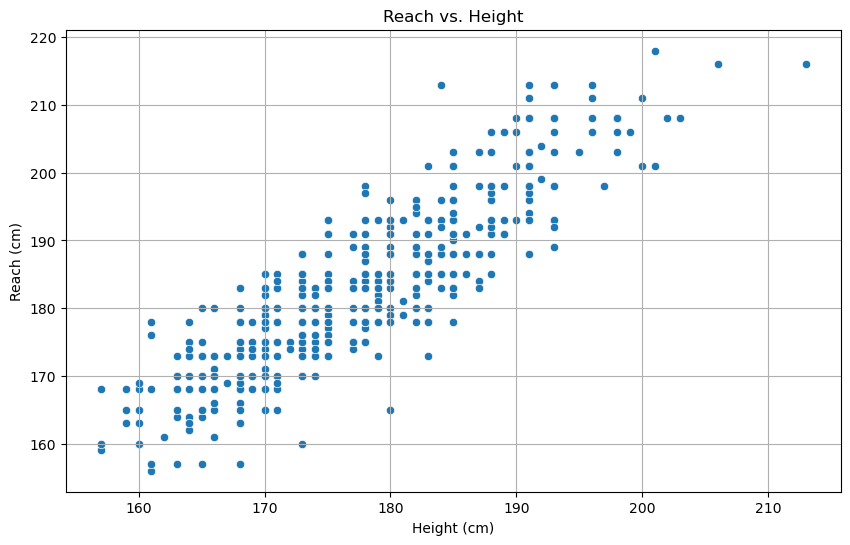

In [15]:
plot_data = data_fighters.dropna(subset=["reach_cm", "height_cm"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=plot_data["height_cm"], y=plot_data["reach_cm"])

plt.xlabel("Height (cm)")
plt.ylabel("Reach (cm)")
plt.title("Reach vs. Height")
plt.grid(True)
plt.show()

In [66]:
import pandas as pd

# 1. CSV-Dateien laden
fighters_df = pd.read_csv("fighters.csv")
matches_df = pd.read_csv("popular_matches.csv")

# 2. Hilfsfunktion zum Bereinigen von Namen
def normalize_name(name):
    if pd.isna(name):
        return ""
    return name.strip().lower()

# 3. Normalisierte Namensspalten erstellen
fighters_df["name_clean"] = fighters_df["name"].apply(normalize_name)
matches_df["opponent_1_name_clean"] = matches_df["opponent_1"].apply(normalize_name)
matches_df["opponent_2_name_clean"] = matches_df["opponent_2"].apply(normalize_name)

# 4. opponent_1-Daten anhängen (Merge mit Fighter-Infos)
merged_df = matches_df.merge(
    fighters_df.add_prefix("opponent_1_"),
    left_on="opponent_1_name_clean",
    right_on="opponent_1_name_clean",
    how="left"
)




# 5. opponent_2-Daten anhängen
merged_df = merged_df.merge(
    fighters_df.add_prefix("opponent_2_"),
    left_on="opponent_2_name_clean",
    right_on="opponent_2_name_clean",
    how="left"
)

# 6. Ergebnis anzeigen (optional)
print(merged_df.head(3))



                date    place             opponent_1             opponent_2  \
0     31 August 2019  Unknown      Vasyl Lomachenko           Luke Campbell   
1  19 September 2019  Unknown  Orlando Fiordigiglio           Sam Eggington   
2     5 October 2019  Unknown      Gennady Golovkin   Sergiy Derevyanchenko   

   opponent_1_estimated_punch_power  opponent_2_estimated_punch_power  \
0                                72                                72   
1                                59                                59   
2                                82                                82   

   opponent_1_estimated_punch_resistance  \
0                                   73.9   
1                                   55.4   
2                                   68.0   

   opponent_2_estimated_punch_resistance  \
0                                   60.5   
1                                   54.5   
2                                   63.3   

   opponent_1_estimated_ability_to_t

In [68]:
# Funktion zur Suche nach beliebigem Boxer
def get_boxer_matches(df, boxer_name):
    boxer_name_clean = boxer_name.strip().lower()

    # Filtere alle Matches, in denen der Name vorkommt
    result = df[
        df["opponent_1_name_clean"].str.contains(boxer_name_clean, na=False) |
        df["opponent_2_name_clean"].str.contains(boxer_name_clean, na=False)
    ]
    return result

# Beispiel: Alle Kämpfe von Usyk
matches = get_boxer_matches(merged_df, "Usyk")

# Ergebnis anzeigen
print(matches["opponent_1"])

3    Chazz Witherspoon 
Name: opponent_1, dtype: object


In [36]:

# Dtypes alphabetisch nach Spaltennamen sortieren und anzeigen
print(merged_df.dtypes.sort_index())

date                                           object
opponent_1                                     object
opponent_1_age                                 object
opponent_1_avg_weight                         float64
opponent_1_clean                               object
opponent_1_country                             object
opponent_1_draws                              float64
opponent_1_estimated_ability_to_take_punch    float64
opponent_1_estimated_punch_power                int64
opponent_1_estimated_punch_resistance         float64
opponent_1_has_been_ko_percentage             float64
opponent_1_height                              object
opponent_1_ko_rate                             object
opponent_1_looses                             float64
opponent_1_name                                object
opponent_1_name_clean                          object
opponent_1_reach                               object
opponent_1_round_ko_percentage                float64
opponent_1_rounds_boxed     

In [72]:
# Gewünschte Spalten
columns = [
   "opponent_1",  "opponent_1_name", "opponent_1_name_clean",  "opponent_1_age",
   "opponent_2", "opponent_2_name", "opponent_2_name_clean",  "opponent_2_age"
]

# Filter für "usyk" in opponent_1 oder opponent_2
search = merged_df[
    merged_df["opponent_1_name_clean"].str.contains("usyk", na=False) |
    merged_df["opponent_2_name_clean"].str.contains("usyk", na=False)
]

# Nur die gewünschten Spalten anzeigen
print(search[columns])

           opponent_1 opponent_1_name opponent_1_name_clean opponent_1_age  \
3  Chazz Witherspoon              NaN     chazz witherspoon            NaN   

       opponent_2 opponent_2_name opponent_2_name_clean opponent_2_age  
3  Oleksandr Usyk  oleksandr usyk        oleksandr usyk             35  


In [20]:
#merged_df.drop(columns=["opponent_1", "opponent_1_name", "opponent_1_clean", "opponent_2", "opponent_2_name", "opponent_2_clean"], inplace=True)

In [74]:
# Zeilen entfernen, bei denen einer der Namen fehlt oder leer ist
merged_df = merged_df[
    merged_df["opponent_1_name_clean"].notna() &
    merged_df["opponent_2_name_clean"].notna() &
   (merged_df["opponent_1_name_clean"].str.strip() != "") &
   (merged_df["opponent_2_name_clean"].str.strip() != "")
]

In [80]:
# Gewünschte Spalten
columns = [
   "opponent_1_name_clean",  "opponent_1_age",
   "opponent_2_name_clean", "opponent_2_age", "verdict"
]


search = merged_df[
    merged_df["opponent_1_name_clean"].str.contains("loma", na=False) |
    merged_df["opponent_2_name_clean"].str.contains("loma", na=False)
]

# Nur die gewünschten Spalten anzeigen
print(search[columns])
#print(merged_df)

    opponent_1_name_clean opponent_1_age opponent_2_name_clean opponent_2_age  \
0        vasyl lomachenko             34         luke campbell             34   
98          jorge linares             37      vasyl lomachenko             34   
151      vasyl lomachenko             34         teofimo lopez             25   

                                verdict  
0     Lomachenko won via UD in round 12  
98   Lomachenko won via TKO in round 10  
151        Lopez won via UD in round 12  


In [82]:
merged_df.columns

Index(['date', 'place', 'opponent_1', 'opponent_2',
       'opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power',
       'opponent_1_estimated_punch_resistance',
       'opponent_2_estimated_punch_resistance',
       'opponent_1_estimated_ability_to_take_punch',
       'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
       'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage',
       'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
       'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight',
       'opponent_2_avg_weight', 'verdict', 'opponent_1_name_clean',
       'opponent_2_name_clean', 'opponent_1_name', 'opponent_1_wins',
       'opponent_1_looses', 'opponent_1_draws', 'opponent_1_ko_rate',
       'opponent_1_stance', 'opponent_1_age', 'opponent_1_height',
       'opponent_1_reach', 'opponent_1_country', 'opponent_2_name',
       'opponent_2_wins', 'opponent_2_looses', 'opponent_2_draws',
       'opponen

In [84]:
def classify_clean_verdict(row):
    """
    Bestimmt das Ergebnis für beide Gegner anhand des Namens im Verdict.
    - Wenn der Name von opponent_1 im ersten Wort des Verdicts steht: opponent_1 = WON, opponent_2 = LOSS
    - Wenn der Name von opponent_2 im ersten Wort des Verdicts steht: opponent_2 = WON, opponent_1 = LOSS
    - Ansonsten: beide DRAW
    """
    if pd.isna(row["verdict"]):
        return "DRAW", "DRAW"

    first_word = row["verdict"].split()[0].strip().lower()
    opp1 = str(row.get("opponent_1_name_clean", "")).strip().lower()
    opp2 = str(row.get("opponent_2_name_clean", "")).strip().lower()

    if first_word in opp1:
        return "WON", "LOSS"
    elif first_word in opp2:
        return "LOSS", "WON"
    else:
        return "DRAW", "DRAW"

In [86]:
# Anwenden auf alle Zeilen
merged_df[["opponent_1_verdict", "opponent_2_verdict"]] = merged_df.apply(
    classify_clean_verdict, axis=1, result_type="expand"
)

# Ergebnis prüfen
print(merged_df[["opponent_1_name_clean", "opponent_2_name_clean", "verdict", "opponent_1_verdict", "opponent_2_verdict"]].head())

  opponent_1_name_clean  opponent_2_name_clean  \
0      vasyl lomachenko          luke campbell   
1  orlando fiordigiglio          sam eggington   
2      gennady golovkin  sergiy derevyanchenko   
3     chazz witherspoon         oleksandr usyk   
4       ebenezer tetteh          daniel dubois   

                             verdict opponent_1_verdict opponent_2_verdict  
0  Lomachenko won via UD in round 12                WON               LOSS  
1    Eggington won via KO in round 2               LOSS                WON  
2    Golovkin won via UD in round 12                WON               LOSS  
3        Usyk won via RTD in round 7               LOSS                WON  
4      Dubois won via TKO in round 1               LOSS                WON  


In [88]:
# Alle Zeilen, bei denen 'draw' (case-insensitive) in der verdict-Spalte vorkommt
draw_rows = merged_df[merged_df["verdict"].str.contains("draw", case=False, na=False)]

# Ausgabe anzeigen
print(draw_rows[["opponent_1_name_clean", "opponent_2_name_clean", "verdict"]])

    opponent_1_name_clean opponent_2_name_clean                      verdict
14         kieran gething            jeff ofori  Draw - 10 round SD decision
78           tyrone nurse            joe hughes  Draw - 12 round SD decision
86           saul alvarez      gennady golovkin  Draw - 12 round SD decision
111        deontay wilder            tyson fury  Draw - 12 round SD decision
132          ted cheesman         kieron conway  Draw - 12 round SD decision


In [90]:
num_draws = merged_df["verdict"].count()
print("Anzahl der Draws:", num_draws)

Anzahl der Draws: 152


In [92]:
missing_names = merged_df[
    merged_df["opponent_1_name_clean"].isna() | (merged_df["opponent_1_name_clean"].str.strip() == "") |
    merged_df["opponent_2_name_clean"].isna() | (merged_df["opponent_2_name_clean"].str.strip() == "")
]

print(missing_names)

Empty DataFrame
Columns: [date, place, opponent_1, opponent_2, opponent_1_estimated_punch_power, opponent_2_estimated_punch_power, opponent_1_estimated_punch_resistance, opponent_2_estimated_punch_resistance, opponent_1_estimated_ability_to_take_punch, opponent_2_estimated_ability_to_take_punch, opponent_1_rounds_boxed, opponent_2_rounds_boxed, opponent_1_round_ko_percentage, opponent_2_round_ko_percentage, opponent_1_has_been_ko_percentage, opponent_2_has_been_ko_percentage, opponent_1_avg_weight, opponent_2_avg_weight, verdict, opponent_1_name_clean, opponent_2_name_clean, opponent_1_name, opponent_1_wins, opponent_1_looses, opponent_1_draws, opponent_1_ko_rate, opponent_1_stance, opponent_1_age, opponent_1_height, opponent_1_reach, opponent_1_country, opponent_2_name, opponent_2_wins, opponent_2_looses, opponent_2_draws, opponent_2_ko_rate, opponent_2_stance, opponent_2_age, opponent_2_height, opponent_2_reach, opponent_2_country, opponent_1_verdict, opponent_2_verdict]
Index: []

[

In [94]:
merged_df.to_csv("merged_df.csv", index=False, encoding="utf-8")

In [164]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler

# CSV-Datei laden
df = pd.read_csv("merged_df_completed.csv")  # ggf. Pfad anpassen

# Kopie für Transformation
df_clean = df.copy()

# 1. Prozentangaben in numerische Werte umwandeln
percent_cols = ["opponent_1_ko_rate", "opponent_2_ko_rate"]
for col in percent_cols:
    df_clean[col] = df_clean[col].str.rstrip('%').astype(float)

# 2. Größen aus ft in cm umwandeln
def convert_height_to_cm(val):
    if isinstance(val, str):
        match = re.search(r"\((\d+\.?\d*)\s*m\)", val)
        if match:
            return float(match.group(1)) * 100
    return np.nan

df_clean["opponent_1_height_cm"] = df_clean["opponent_1_height"].apply(convert_height_to_cm)
df_clean["opponent_2_height_cm"] = df_clean["opponent_2_height"].apply(convert_height_to_cm)

# 3. Reichweite aus inches in cm extrahieren
def extract_reach_cm(val):
    if isinstance(val, str):
        match = re.search(r"\((\d+)\s*cm\)", val)
        if match:
            return float(match.group(1))
    return np.nan

df_clean["opponent_1_reach_cm"] = df_clean["opponent_1_reach"].apply(extract_reach_cm)
df_clean["opponent_2_reach_cm"] = df_clean["opponent_2_reach"].apply(extract_reach_cm)

# 4. One-Hot-Encoding für kategorische Spalten
categorical_cols = ["opponent_1_stance", "opponent_2_stance", "opponent_1_country", "opponent_2_country"]
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# 5. Altersangaben in float konvertieren
df_encoded["opponent_1_age"] = pd.to_numeric(df_encoded["opponent_1_age"], errors="coerce")
df_encoded["opponent_2_age"] = pd.to_numeric(df_encoded["opponent_2_age"], errors="coerce")

# 6. Skalierung der numerischen Features
numeric_cols = [
    "opponent_1_estimated_punch_power", "opponent_2_estimated_punch_power",
    "opponent_1_estimated_punch_resistance", "opponent_2_estimated_punch_resistance",
    "opponent_1_estimated_ability_to_take_punch", "opponent_2_estimated_ability_to_take_punch",
    "opponent_1_rounds_boxed", "opponent_2_rounds_boxed",
    "opponent_1_has_been_ko_percentage", "opponent_2_has_been_ko_percentage",
    "opponent_1_avg_weight", "opponent_2_avg_weight",
    "opponent_1_ko_rate", "opponent_2_ko_rate",
    "opponent_1_height_cm", "opponent_2_height_cm",
    "opponent_1_reach_cm", "opponent_2_reach_cm",
    "opponent_1_age", "opponent_2_age"
]

scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [98]:
df_clean.to_csv("merged_df_clean.csv", index=False, encoding="utf-8")

In [100]:
df_encoded.to_csv("merged_df_encoded.csv", index=False, encoding="utf-8")

In [104]:
df_encoded.columns

Index(['date', 'place', 'opponent_1', 'opponent_2',
       'opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power',
       'opponent_1_estimated_punch_resistance',
       'opponent_2_estimated_punch_resistance',
       'opponent_1_estimated_ability_to_take_punch',
       'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
       'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage',
       'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
       'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight',
       'opponent_2_avg_weight', 'verdict', 'opponent_1_name_clean',
       'opponent_2_name_clean', 'opponent_1_name', 'opponent_1_wins',
       'opponent_1_looses', 'opponent_1_draws', 'opponent_1_ko_rate',
       'opponent_1_age', 'opponent_1_height', 'opponent_1_reach',
       'opponent_2_name', 'opponent_2_wins', 'opponent_2_looses',
       'opponent_2_draws', 'opponent_2_ko_rate', 'opponent_2_age',
       'opponent_2

<Figure size 1200x800 with 0 Axes>

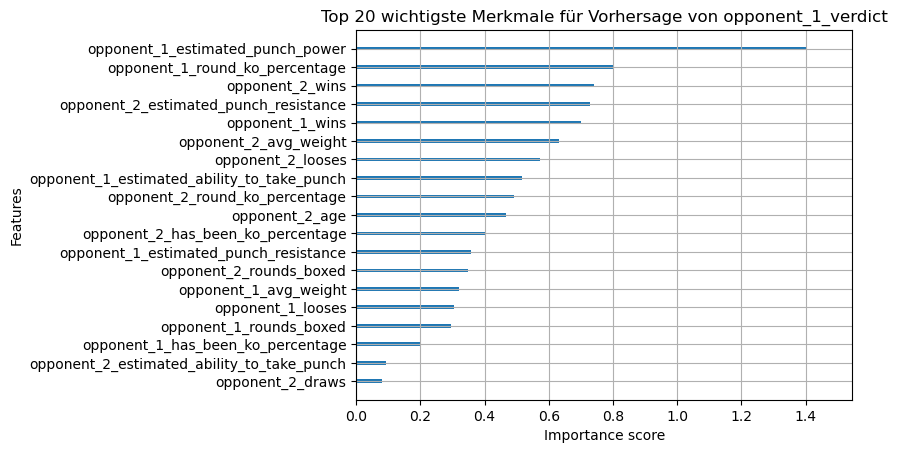

In [116]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Feature Importance plotten
plt.figure(figsize=(12, 8))
plot_importance(model, max_num_features=20, importance_type='gain', show_values=False)
plt.title("Top 20 wichtigste Merkmale für Vorhersage von opponent_1_verdict")
plt.show()


In [166]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import joblib

# [Preprocessing wie bisher!]
# ... Prozentangaben, Height/Reach-Konvertierung, One-Hot-Encoding, Scaling wie gehabt ...

# 🎯 BINARY TARGET erstellen: "WON" = 1, alles andere = 0
df_encoded["target_win"] = (df_encoded["opponent_1_verdict"] == "WON").astype(int)

# 🧹 Unerwünschte Spalten entfernen
columns_to_drop = [
    "date", "verdict", "opponent_1_name_clean", "opponent_2_name_clean",
    "opponent_1_verdict_encoded", "opponent_1_verdict", "opponent_2_verdict"
]
X = df_encoded.drop(columns=columns_to_drop + ["target_win"], errors="ignore")

# 🔢 Nur numerische Spalten verwenden
X = X.select_dtypes(include=["int64", "float64", "bool"])

# 🎯 Zielvariable
y = df_encoded["target_win"]

# 🔀 Trainings-/Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 💪 Class Weights für Binärklassifikation
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[label] for label in y_train])

# 🧠 Modell trainieren
model = XGBClassifier(
    eval_metric="logloss",
    max_depth=3,
    n_estimators=50
)
model.fit(X_train, y_train, sample_weight=sample_weights)

# 🔍 Vorhersagen & Evaluation
custom_threshold = 0.1
y_pred_custom = (y_probs >= custom_threshold).astype(int)

print("\n📊 Klassifikationsbericht:")
print(classification_report(y_test, y_pred, target_names=["Niederlage", "Sieg"]))

joblib.dump(model, "xgb_model.pkl")
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")



📊 Klassifikationsbericht:
              precision    recall  f1-score   support

  Niederlage       0.77      0.81      0.79        21
        Sieg       0.56      0.50      0.53        10

    accuracy                           0.71        31
   macro avg       0.66      0.65      0.66        31
weighted avg       0.70      0.71      0.71        31



['feature_names.pkl']

In [ ]:
!streamlit run boxing_predictor.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.178.27:8502



In [180]:
code = '''import streamlit as st
import pandas as pd
import joblib
import numpy as np
from xgboost import XGBClassifier

# 🔃 Modell und Feature-Namen laden
model = joblib.load("xgb_model.pkl")
feature_names = joblib.load("feature_names.pkl")
df = pd.read_csv("merged_df_encoded.csv")

# 🎯 GUI-Titel
st.title("🥊 Boxing Match Predictor")
st.markdown("Wähle zwei Boxer aus und erhalte eine **theoretische Vorhersage** über den Kampf-Ausgang.")

# 📋 Boxerliste
boxer_names = sorted(set(df["opponent_1_name_clean"].dropna()) | set(df["opponent_2_name_clean"].dropna()))

# 📥 Eingabe durch den Nutzer
boxer1 = st.selectbox("👤 Boxer 1", boxer_names)
boxer2 = st.selectbox("👤 Boxer 2", [n for n in boxer_names if n != boxer1])

# 🧠 Vorhersagefunktion
def predict_theoretical_match(boxer1, boxer2, df, model, feature_names):
    boxer_a, boxer_b = boxer1, boxer2

    # Feature-Mittelwerte berechnen
    b1_data = df[(df["opponent_1_name_clean"] == boxer_a) | (df["opponent_2_name_clean"] == boxer_a)].mean(numeric_only=True)
    b2_data = df[(df["opponent_1_name_clean"] == boxer_b) | (df["opponent_2_name_clean"] == boxer_b)].mean(numeric_only=True)

    if b1_data.empty or b2_data.empty:
        st.error("❌ Für einen oder beide Boxer konnten keine ausreichenden Daten gefunden werden.")
        return

    # Eingabe-Datenframe aufbauen
    input_data = {}
    for feat in feature_names:
        if "opponent_1" in feat:
            base_feat = feat.replace("opponent_1_", "")
            input_data[feat] = b1_data.get(f"opponent_1_{base_feat}", b1_data.get(base_feat, 0))
        elif "opponent_2" in feat:
            base_feat = feat.replace("opponent_2_", "")
            input_data[feat] = b2_data.get(f"opponent_2_{base_feat}", b2_data.get(base_feat, 0))

    input_df = pd.DataFrame([input_data])

    # Sicherstellen, dass alle Features vorhanden sind
    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[feature_names]

    # Vorhersage
    probs = model.predict_proba(input_df)[0]
    pred = model.predict(input_df)[0]

    # Ausgabe
    st.markdown("### 📈 Gewinnwahrscheinlichkeiten:")
    st.write(f"**{boxer_a} gewinnt:** {probs[1]*100:.2f}%")
    st.write(f"**{boxer_b} gewinnt:** {probs[0]*100:.2f}%")

    sieger = boxer_a if pred == 1 else boxer_b
    st.markdown(f"### 🏆 Erwarteter Sieger: **{sieger}**")

# 🧪 Button
if st.button("🔮 Vorhersage starten"):
    predict_theoretical_match(boxer1, boxer2, df, model, feature_names)

'''

with open("boxing_predictor.py", "w", encoding="utf-8") as f:
    f.write(code)


In [ ]:
features_from_pickle = joblib.load("feature_names.pkl")
print("🔎 Feature Names:", features_from_pickle)

In [48]:
# Speichern des Modells in einem plattformunabhängigen Format
model.save_model("xgb_model.json")

In [56]:
!pip install fastapi uvicorn joblib pandas xgboost

In [58]:
from fastapi import FastAPI
import joblib
import pandas as pd
from pydantic import BaseModel

app = FastAPI()

model = joblib.load("xgb_model.pkl")
le = joblib.load("label_encoder.pkl")
feature_names = joblib.load("feature_names.pkl")

class PredictionInput(BaseModel):
    features: dict

@app.post("/predict")
def predict(input: PredictionInput):
    df = pd.DataFrame([input.features])[feature_names].fillna(0)
    probs = model.predict_proba(df)[0]
    pred = model.predict(df)[0]
    label = le.inverse_transform([pred])[0]
    return {"prediction": label, "probabilities": dict(zip(le.classes_, probs.round(3)))}

In [60]:
code = '''from fastapi import FastAPI
import joblib
import pandas as pd
from pydantic import BaseModel

app = FastAPI()

model = joblib.load("xgb_model.pkl")
le = joblib.load("label_encoder.pkl")
feature_names = joblib.load("feature_names.pkl")

class PredictionInput(BaseModel):
    features: dict

@app.post("/predict")
def predict(input: PredictionInput):
    df = pd.DataFrame([input.features])[feature_names].fillna(0)
    probs = model.predict_proba(df)[0]
    pred = model.predict(df)[0]
    label = le.inverse_transform([pred])[0]
    return {"prediction": label, "probabilities": dict(zip(le.classes_, probs.round(3)))}
'''

with open("app.py", "w", encoding="utf-8") as f:
    f.write(code)